# Key Points 

-Per the bar chart, Capomulin and Ramicane had the highest number of mice tested.
-Capomulin and Ramicane are the most effective tumor-reducing drugs.
-Tumor volume increases as the mice gain weight.


In [1]:
import scipy.stats as st
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Merge mouse_metadata and study_results on 'Mouse ID'

# study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the number of unique mice IDs
unique_mice_ids_before = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice IDs before cleaning: {unique_mice_ids_before}")

# Check for duplicate mouse IDs with duplicate time points
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

# Display data associated with duplicate mouse IDs
if not duplicate_mice.empty:
    print("Data associated with duplicate mouse IDs:")
    print(duplicate_mice)
    
    # Create a new DataFrame with duplicate data removed
    cleaned_data = merged_data.drop_duplicates(['Mouse ID', 'Timepoint'])
    
    # Display the updated number of unique mice IDs
    unique_mice_ids_after = cleaned_data['Mouse ID'].nunique()
    print(f"Number of unique mice IDs after cleaning: {unique_mice_ids_after}")
else:
    print("No duplicate mouse IDs with duplicate time points found.")
    cleaned_data = merged_data
    unique_mice_ids_after = unique_mice_ids_before


Number of unique mice IDs before cleaning: 249
Data associated with duplicate mouse IDs:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
10

In [3]:
# Assuming 'Tumor Volume (mm3)' is the column you want to analyze
# Replace 'Tumor Volume (mm3)' with the actual column name in your dataset
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics DataFrame
print("\nSummary Statistics:")
print(summary_statistics)


Summary Statistics:
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


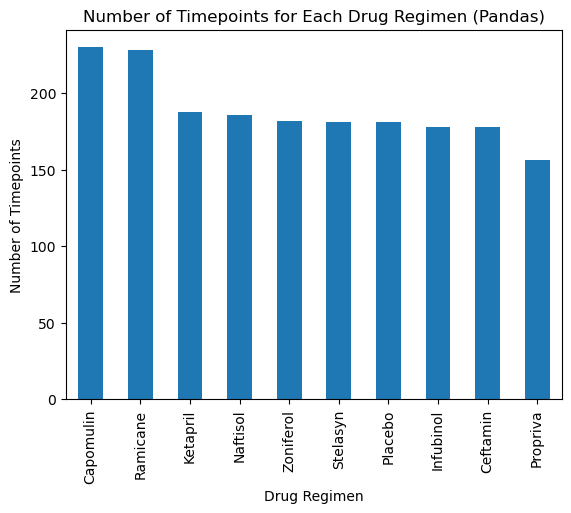

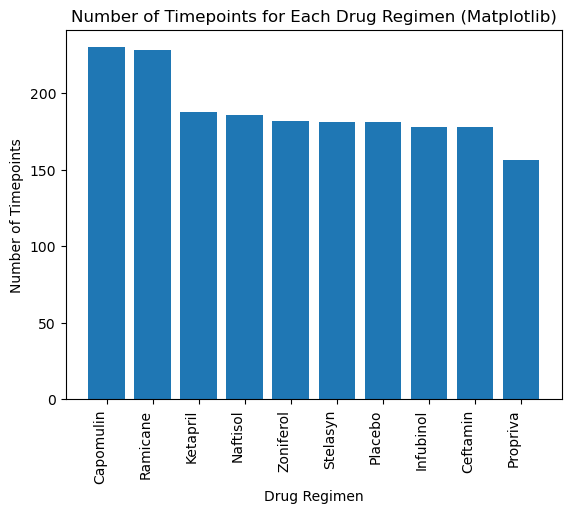

In [4]:
# Assuming you have the 'cleaned_data' DataFrame
import matplotlib.pyplot as plt

# Create the first bar chart using Pandas DataFrame.plot() method
bar_chart_pandas = cleaned_data['Drug Regimen'].value_counts().plot(kind='bar', title='Number of Timepoints for Each Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

# Create the second bar chart using Matplotlib's pyplot methods
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
drug_regimen_labels = drug_regimen_counts.index

plt.bar(drug_regimen_labels, drug_regimen_counts)
plt.title('Number of Timepoints for Each Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Adjust x-axis labels
plt.xticks(rotation=90, ha='right')  # Rotate the labels for better visibility

plt.show()


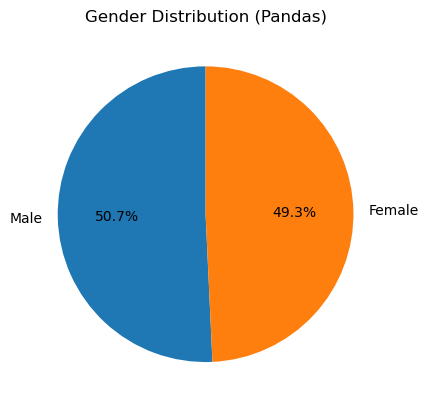

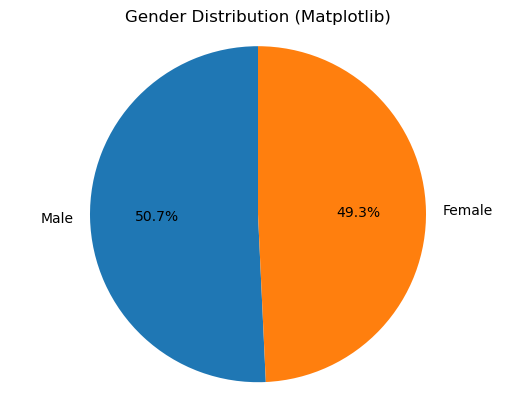

In [5]:
# Assuming you have the 'cleaned_data' DataFrame
import matplotlib.pyplot as plt

# Create the first pie chart using Pandas DataFrame.plot() method
pie_chart_pandas = cleaned_data['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Gender Distribution (Pandas)')
plt.ylabel('')  # To remove the 'Sex' label
plt.show()

# Create the second pie chart using Matplotlib's pyplot methods
sex_counts = cleaned_data['Sex'].value_counts()
sex_labels = sex_counts.index

plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution (Matplotlib)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


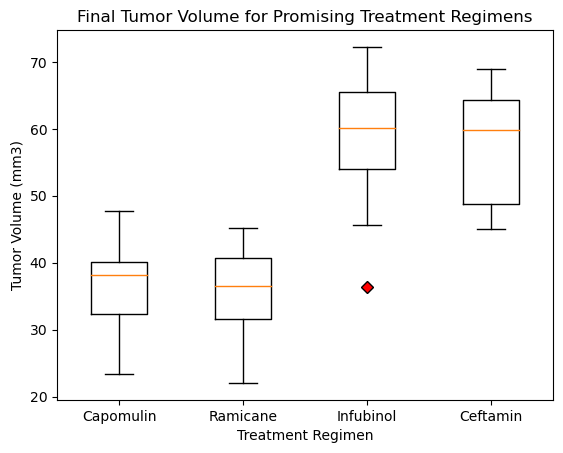

In [6]:
import matplotlib.pyplot as plt

# Step 1: Create a grouped DataFrame for the last time point of each mouse
last_timepoint_df = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint_data = pd.merge(last_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Step 2: Create a list to hold treatment names and tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

# Step 3: Loop through each drug and append the final tumor volumes to the list
for drug in treatments:
    final_tumor_volume = last_timepoint_data.loc[last_timepoint_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)

# Step 4: Determine outliers using upper and lower bounds and print the results
for i, drug in enumerate(treatments):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    
    print(f"Potential outliers for {drug}: {outliers}")

# Step 5: Generate a box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))
ax.set_title('Final Tumor Volume for Promising Treatment Regimens')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()


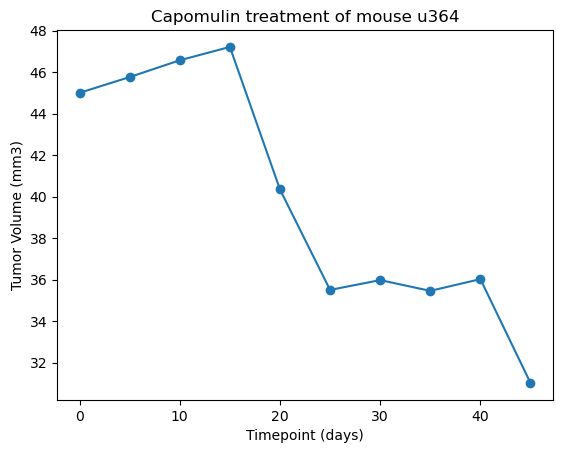

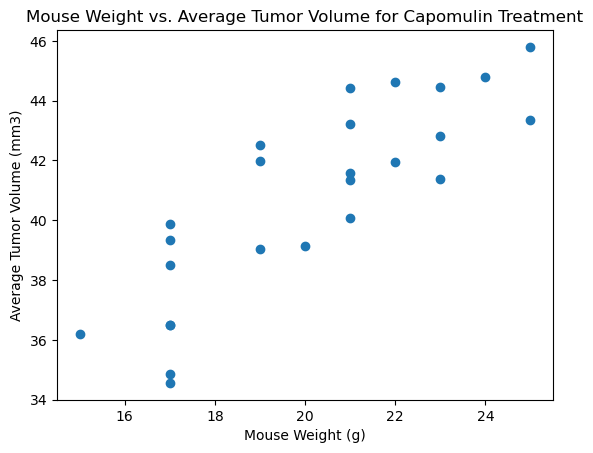

In [7]:
import matplotlib.pyplot as plt

# Step 1: Select a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
single_mouse_capomulin = capomulin_data.loc[capomulin_data['Mouse ID'] == 'u364']

# Step 2: Generate a line plot of tumor volume versus time point for that mouse
plt.plot(single_mouse_capomulin['Timepoint'], single_mouse_capomulin['Tumor Volume (mm3)'], marker='o')
plt.title('Capomulin treatment of mouse u364')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

# Step 3: Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


Correlation Coefficient: 0.8419363424694722


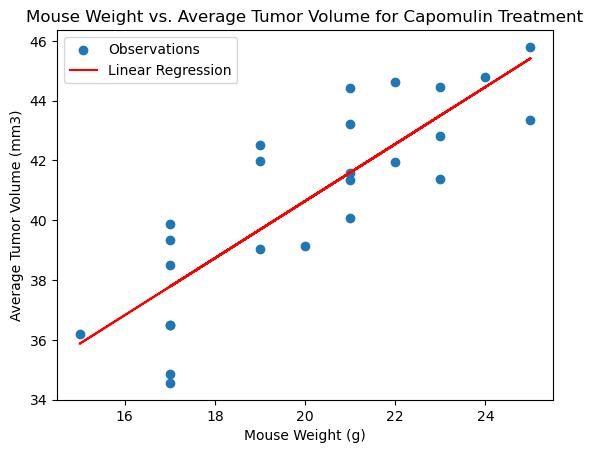

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

correlation_coefficient = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

predicted_values = slope * mouse_weight + intercept

plt.scatter(mouse_weight, average_tumor_volume, marker='o', label='Observations')
plt.plot(mouse_weight, predicted_values, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()
